In [130]:
import pandas as pd
import glob
import re
import datetime 
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", 50)
pd.options.display.max_colwidth = 100

In [62]:

li = []

for filename in glob.glob("data/*.csv"):
    df = pd.read_csv(filename, index_col=None, header=0)
    df["year"] = [int(re.findall(r'\d+', filename)[0])]*len(df)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

In [63]:
frame['year_mon'] = frame.apply(lambda x: datetime.date(x.year,datetime.datetime.strptime(x.Month,"%B").month,1),axis =1)
frame['mon_int'] = frame.Month.apply(lambda x: datetime.datetime.strptime(x,"%B").month)

In [64]:
frame['date_numerical'] = frame.year_mon.map(datetime.datetime.toordinal)

In [65]:
all_brand = frame.groupby(['year','Month','year_mon'])['RentalCarGrossSales'].sum().reset_index()

### Total sales per month

<AxesSubplot:xlabel='year_mon', ylabel='RentalCarGrossSales'>

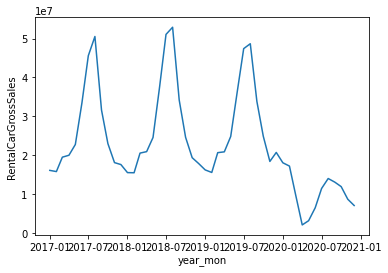

In [66]:
sns.lineplot(data=all_brand,x='year_mon',y='RentalCarGrossSales',ci=0.90)

<AxesSubplot:xlabel='date_numerical', ylabel='RentalCarGrossSales'>

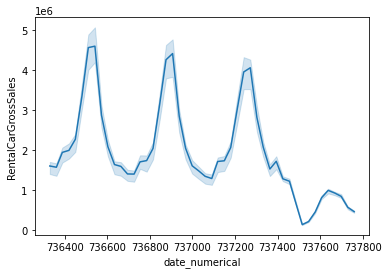

In [46]:
sns.lineplot(data=frame,x='date_numerical',y='RentalCarGrossSales',ci=20)

<AxesSubplot:xlabel='year', ylabel='RentalCarGrossSales'>

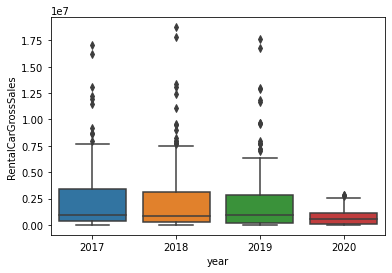

In [47]:
sns.boxplot(data=frame, x='year',y='RentalCarGrossSales')

<AxesSubplot:xlabel='RentalCarGrossSales', ylabel='Count'>

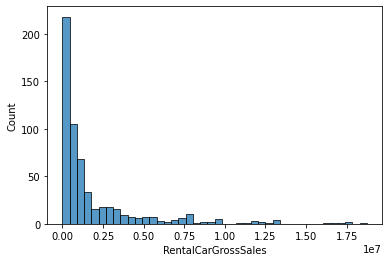

In [48]:
sns.histplot(frame.RentalCarGrossSales)

<AxesSubplot:xlabel='RentalCarGrossSales', ylabel='Count'>

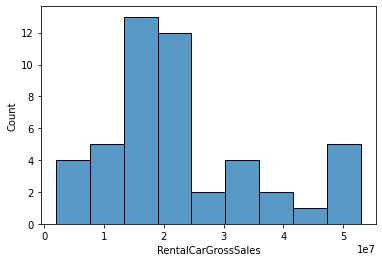

In [49]:
sns.histplot(all_brand.RentalCarGrossSales)

In [32]:
per_company = frame.groupby(['Company','year_mon']).agg({'RentalCarGrossSales':'sum'})

In [35]:
per_company

RentalCarGrossSales
Company                            year_mon                       
AVIS BUDGET Car Rental             2017-01-01              3453308
                                   2017-02-01              3735767
                                   2017-03-01              4581703
                                   2017-04-01              4785559
                                   2017-05-01              5445566
...                                                            ...
Zeeba WA, LLC dba Zeeba Rent-A-Van 2021-08-01                 2267
                                   2021-09-01                 2985
                                   2021-10-01                 1490
                                   2021-11-01                  248
                                   2021-12-01                 1098

[693 rows x 1 columns]

In [80]:
# import pandas as pd
# from predicthq import Client
# import requests

# ACCESS_TOKEN = '-'
# phq = Client(access_token=ACCESS_TOKEN)

# def get_place_hierarchy(latlong, token):
#     # latlong = 'lat,lon'

#     response = requests.get(
#         url="https://api.predicthq.com/v1/places/hierarchies",
#         headers={
#           "Authorization": "Bearer " + token,
#           "Accept": "application/json"
#         },
#         params={
#             "location.origin": latlong
#         }
#     )

#     return response.json()
# def get_place_name(place_id,ACCESS_TOKEN):
#     phq = Client(access_token=ACCESS_TOKEN)
#     ny_state = phq.places.search(id=place_id).results[0]
#     return ny_state.name

# place_hierarchy = get_place_hierarchy('47.61091992161532,-122.33669224272333',ACCESS_TOKEN)

In [94]:
# p = place_hierarchy['place_hierarchies'][0][4]['place_id']
# p

'5799783'

In [95]:
get_place_name(p,ACCESS_TOKEN)

'King County'

In [97]:
from timezonefinder import TimezoneFinder
timezone = TimezoneFinder().timezone_at(lat=47.61091992161532, lng=-122.33669224272333)
print(timezone)

America/Los_Angeles


In [101]:
parameters = dict()
place_ids = [p]
parameters.update(place__scope=place_ids)

start_time = "2017-01-01"
end_time = "2021-12-31"
parameters.update(active__gte=start_time)
parameters.update(active__lte=end_time)
parameters.update(active__tz=timezone)

rank_type = "rank" # Set to be either "rank", "local_rank" or "aviation_rank".
rank_threshold = 40 
filter_parameter = "gte"
parameters.update({f"{rank_type}__{filter_parameter}": rank_threshold})

In [102]:
parameters

{'place__scope': ['5799783'],
 'active__gte': '2017-01-01',
 'active__lte': '2021-12-31',
 'active__tz': 'America/Los_Angeles',
 'rank__gte': 40}

In [103]:
# results = []

# # Iterating through all the events that match our criteria and adding them to our results
# for event in phq.events.search(parameters).iter_all():
#     results.append(event.to_dict())

# # Converting the results to a DataFrame
# event_df = pd.DataFrame(results)

In [109]:
# event_df.to_csv('seattle_events.csv')

In [121]:
event_features = pd.read_csv('/Users/aisling/Documents/Crux/ElasticNet/1.csv')

In [122]:
event_features.head()

date  academic_exams_binary  academic_graduation_binary  \
0  2017-01-01                    0.0                         0.0   
1  2017-01-02                    0.0                         0.0   
2  2017-01-03                    0.0                         0.0   
3  2017-01-04                    0.0                         0.0   
4  2017-01-05                    0.0                         0.0   

   academic_holidays_binary  academic_session_attendance  \
0                       0.0                          0.0   
1                       0.0                          0.0   
2                       0.0                          0.0   
3                       0.0                          0.0   
4                       0.0                          0.0   

   academic_session_binary  attended_count  big_event_binary  \
0                      0.0             0.0               0.0   
1                      0.0             0.0               0.0   
2                      0.0             0.0               0.0   
3                      0.0             0.0               0.0   
4                      0.0             0.0               0.0   

   cultural_attendance  demand_surge_binary  large_events_attendance  \
0                  0.0                  0.0                      0.0   
1                  0.0                  0.0                      0.0   
2                  0.0                  0.0                      0.0   
3                  0.0                  0.0                      0.0   
4                  0.0                  0.0                      0.0   

   qdiscretized_att_bins  day_expo_attendance  multiday_attendance  \
0                      0                  0.0                  0.0   
1                      0                  0.0                  0.0   
2                      0                  0.0                  0.0   
3                      0                  0.0                  0.0   
4                      0                  0.0                  0.0   

   short_expo_attendance  observance_binary  school_holidays_binary  \
0                    0.0                0.0                     0.0   
1                    0.0                0.0                     0.0   
2                    0.0                0.0                     0.0   
3                    0.0                0.0                     0.0   
4                    0.0                0.0                     0.0   

   air_quality_rank  blizzard_rank  cold_wave_rank  cold_wave_snow_rank  \
0               0.0            0.0             0.0                  0.0   
1               0.0            0.0             0.0                  0.0   
2               0.0            0.0             0.0                  0.0   
3               0.0            0.0             0.0                  0.0   
4               0.0            0.0             0.0                  0.0   

   cold_wave_storm_rank  dust_rank  dust_storm_rank  flood_rank  ...  \
0                   0.0        0.0              0.0         0.0  ...   
1                   0.0        0.0              0.0         0.0  ...   
2                   0.0        0.0              0.0         0.0  ...   
3                   0.0        0.0              0.0         0.0  ...   
4                   0.0        0.0              0.0         0.0  ...   

   soccer_attendance_bin  sports_attendance_bin  tennis_attendance  \
0                      0                      0                0.0   
1                      0                      0                0.0   
2                      0                      0                0.0   
3                      0                      0                0.0   
4                      0                      0                0.0   

   cold_binary  disaster_binary  hot_binary  storm_binary  sports_sum  \
0          0.0              0.0         0.0           0.0      9259.0   
1          0.0              0.0         0.0           0.0         0.0   
2          0.0              0.0         0.0      

In [123]:
zero_features = []
for ix, val in (event_features.std() == 0).items():
    if val:
        zero_features.append(ix)
        print(ix)

air_quality_rank
blizzard_rank
cold_wave_rank
cold_wave_snow_rank
cold_wave_storm_rank
dust_rank
dust_storm_rank
flood_rank
heat_wave_rank
hurricane_rank
severe_weather_mobility_count
thunderstorm_rank
tornado_rank
tropical_storm_rank
boxing_attendance
boxing_attendance_bin
f1_attendance
f1_attendance_bin
horse_racing_attendance
horse_racing_attendance_bin
tennis_attendance
cold_binary
disaster_binary
hot_binary
storm_binary
master_id


/var/folders/3s/593hdkl926l026c4t92nlx7h0000gn/T/ipykernel_3790/141646575.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  for ix, val in (event_features.std() == 0).items():


In [124]:
non_zero_event_features = event_features[[col for col in event_features.columns if not (col in zero_features)]].copy()

In [125]:
non_zero_event_features['date'] = pd.to_datetime(non_zero_event_features['date'])
non_zero_event_features['year'] = non_zero_event_features['date'].apply(lambda x: x.year)
non_zero_event_features['month'] = non_zero_event_features['date'].apply(lambda x: x.month)

In [126]:
phq_features = non_zero_event_features.groupby(['year','month']).sum().reset_index()

In [127]:
phq_features.head()

year  month  academic_exams_binary  academic_graduation_binary  \
0  2017      1                    0.0                         0.0   
1  2017      2                    0.0                         0.0   
2  2017      3                    0.0                         0.0   
3  2017      4                    0.0                         0.0   
4  2017      5                    0.0                         0.0   

   academic_holidays_binary  academic_session_attendance  \
0                       0.0                          0.0   
1                       0.0                          0.0   
2                       0.0                          0.0   
3                       0.0                          0.0   
4                       0.0                          0.0   

   academic_session_binary  attended_count  big_event_binary  \
0                      0.0             0.0               0.0   
1                      0.0             0.0               0.0   
2                      0.0             0.0               0.0   
3                      0.0             0.0               0.0   
4                      0.0             0.0               0.0   

   cultural_attendance  demand_surge_binary  large_events_attendance  \
0                  0.0                  0.0                      0.0   
1                  0.0                  0.0                      0.0   
2                  0.0                  0.0                      0.0   
3                  0.0                  0.0                      0.0   
4                  0.0                  0.0                      0.0   

   qdiscretized_att_bins  day_expo_attendance  multiday_attendance  \
0                      0                  0.0                  0.0   
1                      0                  0.0                  0.0   
2                      0                  0.0                  0.0   
3                      0                  0.0                  0.0   
4                      0                  0.0                  0.0   

   short_expo_attendance  observance_binary  school_holidays_binary  \
0                    0.0                0.0                     0.0   
1                    0.0                0.0                     0.0   
2                    0.0                0.0                     0.0   
3                    0.0                0.0                     0.0   
4                    0.0                0.0                     0.0   

   baseball_attendance  baseball_attendance_bin  basketball_attendance  \
0                  0.0                        0                    0.0   
1                  0.0                        0                    0.0   
2                  0.0                        0                    0.0   
3                  0.0                        0                    0.0   
4                  0.0                        0                    0.0   

   basketball_attendance_bin  soccer_attendance  soccer_attendance_bin  \
0                          0                0.0                      0   
1                          0                0.0                      0   
2                          0                0.0                      0   
3                          0                0.0                      0   
4                          0                0.0                      0   

   sports_attendance_bin  sports_sum  sports_count  conferences_sum  \
0                      0    185598.0          16.0           6650.0   
1                      0    120106.0          12.0          20454.0   
2                      0    133716.0          18.0         384877.0   
3                      0    376391.0          39.0          77006.0   
4                      0    536834.0          46.0          72822.0   

   conferences_count  expos_sum  expos_count  community_sum  community_count  \
0               31.0    39920.0         17.0       241157.0            179.0   
1               21.0   103681.0         17.0       111498.0            223.0   
2   

In [13]:
all_brand['mon'] = all_brand['year_mon'].apply(lambda x: x.month)

In [14]:
df = pd.merge(all_brand,phq_features,left_on=['year','mon'],right_on=['year','month'],how='left')

In [15]:
df.drop(['Month','year_mon','month'],axis=1,inplace=True)

In [16]:
df.sort_values(['year','mon'],inplace=True)

In [17]:
df['sales_last_mon'] = df.RentalCarGrossSales.shift(-1)

In [18]:
df.head(10)

year  RentalCarGrossSales  mon  academic_exams_binary  \
4   2017             16054808    1                    0.0   
3   2017             15746674    2                    0.0   
7   2017             19453321    3                    0.0   
0   2017             19951807    4                    0.0   
8   2017             22719960    5                    0.0   
6   2017             33441004    6                    0.0   
5   2017             45590885    7                    0.0   
1   2017             50539918    8                    0.0   
11  2017             31593570    9                    0.0   
10  2017             22948783   10                    0.0   

    academic_graduation_binary  academic_holidays_binary  \
4                          0.0                       0.0   
3                          0.0                       0.0   
7                          0.0                       0.0   
0                          0.0                       0.0   
8                          0.0                       0.0   
6                          0.0                       0.0   
5                          0.0                       0.0   
1                          0.0                       0.0   
11                         0.0                       0.0   
10                         0.0                       0.0   

    academic_session_attendance  academic_session_binary  attended_count  \
4                           0.0                      0.0             0.0   
3                           0.0                      0.0             0.0   
7                           0.0                      0.0             0.0   
0                           0.0                      0.0             0.0   
8                           0.0                      0.0             0.0   
6                           0.0                      0.0             0.0   
5                           0.0                      0.0             0.0   
1                           0.0                      0.0             0.0   
11                          0.0                      0.0             0.0   
10                          0.0                      0.0             0.0   

    big_event_binary  cultural_attendance  demand_surge_binary  \
4                0.0                  0.0                  0.0   
3                0.0                  0.0                  0.0   
7                0.0                  0.0                  0.0   
0                0.0                  0.0                  0.0   
8                0.0                  0.0                  0.0   
6                0.0                  0.0                  0.0   
5                0.0                  0.0                  0.0   
1                0.0                  0.0                  0.0   
11               0.0                  0.0                  0.0   
10               0.0                  0.0                  0.0   

    large_events_attendance  qdiscretized_att_bins  day_expo_attendance  \
4                       0.0                      0                  0.0   
3                       0.0                      0                  0.0   
7                       0.0                      0                  0.0   
0                       0.0                      0                  0.0   
8                       0.0                      0                  0.0   
6                       0.0                      0                  0.0   
5                       0.0                      0                  0.0   
1                       0.0                      0                  0.0   
11                      0.0                      0                  0.0   
10                      0.0                      0                  0.0   

    multiday_attendance  short_expo_attendance  observance_binary  \
4                   0.0                    0.0                0.0   
3                   0.0                    0.0                0.0   
7                   0.0                    0.0                0.0   
0    

In [235]:
upper_thresh = df.RentalCarGrossSales.quantile(.75)

# forecast
sales = last_mon_sales + mon + year + phq_events

Testing: 2019, 2021

In [270]:
from sklearn.model_selection import TimeSeriesSplit

X = df.loc[:,df.columns!='RentalCarGrossSales']
y = df.RentalCarGrossSales

tscv = TimeSeriesSplit(n_splits=2, test_size=12)


In [271]:
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[X.index==train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35] TEST: [36 37 38 39 40 41 42 43 44 45 46 47]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] TEST: [48 49 50 51 52 53 54 55 56 57 58 59]


In [305]:
df = df.dropna()
df_train = df[(df.year<2019)|((df.year>2019)&(df.year<2021))].copy()
df_test = df[df.year.isin([2019,2021])].copy()

X_train,y_train = df_train.loc[:,df.columns!='RentalCarGrossSales'],df_train.RentalCarGrossSales
X_test, y_test = df_test.loc[:,df.columns!='RentalCarGrossSales'],df_test.RentalCarGrossSales

In [306]:
enet_cv = ElasticNetCV(cv = 10).fit(X_train,y_train)
y_pred = enet_cv.predict(X_test)

In [316]:
np.mean(np.abs((y_test - y_pred) / y_test)) * 100

21.87208086793497

In [317]:
(y_test - y_pred).abs().sum() / y_test.sum()

0.22386233310182085

In [307]:
test = X_test.copy()
test['prd'] = y_pred
test['test']=y_test
test.sort_values(['year','mon'],inplace=True)
test['year_mon']=test.apply(lambda x: str(int(x.year))+'-'+str(int(x.mon)),axis=1)


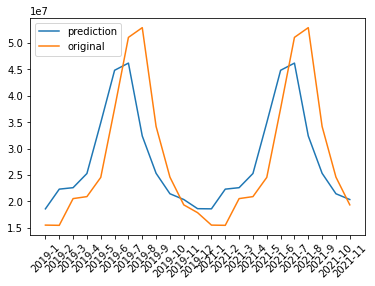

In [428]:
plt.plot(test.year_mon, test.prd, label = "prediction")
plt.plot(test.year_mon, test.test, label = "original")
# plt.plot(test.year_mon,[uper_thresh]*len(test.year_mon),label='75% quantile')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# baseline
sales = last_mon_sales + mon + year

In [309]:

X_train_base,y_train = X_train[['year','mon','sales_last_mon']],df_train.RentalCarGrossSales
X_test_base, y_test = X_test[['year','mon','sales_last_mon']],df_test.RentalCarGrossSales

In [310]:
enet_cv_base = ElasticNetCV(cv = 10).fit(X_train_base,y_train)
y_pred_base = enet_cv_base.predict(X_test_base)

In [336]:
np.mean(np.abs((y_test - y_pred_base) / y_test)) * 100

21.518809679229626

In [337]:
(y_test - y_pred_base).abs().sum() / y_test.sum()

0.22151565850012728

In [338]:
enet_cv_base.coef_

array([0.        , 0.        , 0.76202959])

In [323]:
cdf = df.copy()
cdf['base_predict'] = enet_cv_base.predict(cdf[['year','mon','sales_last_mon']])
cdf['remainder'] = cdf.RentalCarGrossSales - cdf.base_predict
cdf['year_mon'] = cdf.apply(lambda x: str(int(x.year))+'-'+str(int(x.mon)),axis=1)

In [327]:
cdf['flag'] = np.where(cdf.remainder>cdf.remainder.quantile(.75),1,0)

<AxesSubplot:xlabel='remainder', ylabel='Count'>

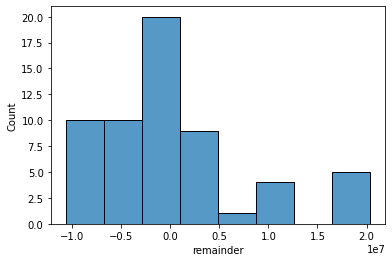

In [332]:
sns.histplot(cdf.remainder)

<AxesSubplot:xlabel='flag', ylabel='Count'>

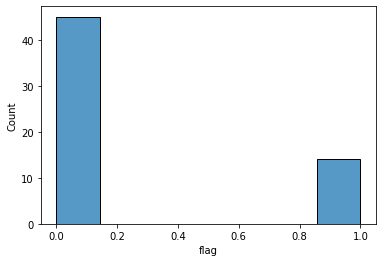

In [335]:
sns.histplot(cdf.flag)

<AxesSubplot:xlabel='flag', ylabel='RentalCarGrossSales'>

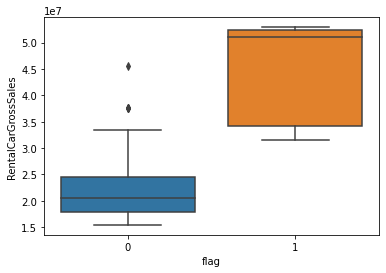

In [350]:
sns.boxplot(data = cdf, y='RentalCarGrossSales',x='flag')

## Feature Selection - classification

### feature importance 

In [388]:
Xc=cdf[feature_cols]
# Xc=np.nan_to_num(Xc.astype(np.float32))
yc=cdf.flag#.to_list()

[0.01386687 0.00077002 0.06339867 0.01922878 0.02130709 0.00703934
 0.00652532 0.00631947 0.00517136 0.00987545 0.00575808 0.00379938
 0.00795435 0.0057722  0.03324619 0.0125291  0.02728015 0.02252228
 0.00242399 0.00036605 0.01712196 0.01210316 0.00783845 0.06896823
 0.02739559 0.01685742 0.01868337 0.03765775 0.01717109 0.01988466
 0.02550497 0.05023689 0.017908   0.07457854 0.05180072 0.03573705
 0.01726479 0.02188457 0.13995503 0.04629361]


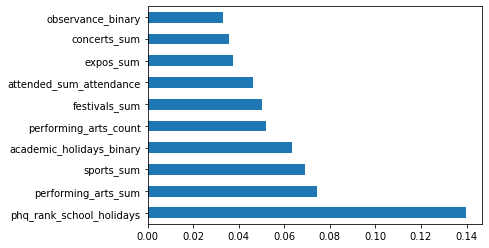

In [389]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(Xc,yc)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=Xc.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [415]:
feat_importances.sort_values(ascending=False).head(7)

phq_rank_school_holidays    0.139955
performing_arts_sum         0.074579
sports_sum                  0.068968
academic_holidays_binary    0.063399
performing_arts_count       0.051801
festivals_sum               0.050237
attended_sum_attendance     0.046294
dtype: float64

In [422]:
feat_imp_col = feat_importances.sort_values(ascending=False).head(7).index

### Univariate Selection

In [410]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# feature extraction
uni_test = SelectKBest(score_func=f_classif, k=4)
uni_fit = uni_test.fit(Xc, yc)

uni_col = uni_test.get_support(indices=True)
uni_featrures_new = Xc.iloc[:,uni_col]

# summarize scores
set_printoptions(precision=3)
print(uni_fit.scores_)
uni_features = uni_fit.transform(Xc)
# summarize selected features
print(uni_features[0:5,:])

[3.309e+00 5.636e-01 6.387e+00 1.813e-02 3.044e-01 8.892e-02 1.914e-03
 2.300e-01 9.171e-01 1.388e+00 1.807e+00 3.068e-02 3.217e+00 1.802e-02
 4.271e+00 3.403e+00 7.686e+00 7.543e+00 2.145e+00 1.160e+00 4.079e+00
 3.826e+00 2.121e+00 9.399e+00 2.167e-02 1.167e+00 1.827e-01 2.140e+00
 4.548e-01 1.486e+00 6.417e-01 9.833e+00 3.421e-01 7.937e+00 5.564e+00
 9.874e-01 1.308e-01 4.369e+00 2.222e+01 4.046e+00]
[[185598. 131211.  78387.      0.]
 [120106.  69627. 106119.      0.]
 [133716.  90807.  85252.      0.]
 [376391.  56910.  96628.      0.]
 [536834. 448796.  82231.      0.]]


In [412]:
uni_featrures_new.head()

sports_sum  festivals_sum  performing_arts_sum  phq_rank_school_holidays
4    185598.0       131211.0              78387.0                         0
3    120106.0        69627.0             106119.0                         0
7    133716.0        90807.0              85252.0                         0
0    376391.0        56910.0              96628.0                         0
8    536834.0       448796.0              82231.0                         0

In [404]:
Xc.shape

(59, 40)

In [405]:
uni_features.shape

(59, 4)

### recursive feature elimination

In [390]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(Xc, yc)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packag

Num Features: 3
Selected Features: [False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False  True False False
 False False False False]
Feature Ranking: [24 34 30 22  1 18 25  4 37  3 38 26  2  9 29 15 10 31 11 36 13 33 32 14
 16 12 35  1 28  5 21  7 27  1 19  6 17 23 20  8]


/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver op

# classification

In [358]:
feature_cols = non_zero_event_features.columns.to_list()[1:-2]

In [424]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# testing two feature selection techniques

## Univariate selection
# uni_featrures_new

## Feature importance
# Xc[feat_imp_col]

X_ctrain, X_ctest, y_ctrain, y_ctest = train_test_split(Xc[feat_imp_col], yc, test_size=0.3, random_state=42)
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_ctrain, y_ctrain)

LogisticRegression(max_iter=200)

In [430]:
# Feature importance col prediction
y_cpred = logreg.predict(X_ctest)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_ctest, y_ctest)))

Accuracy of logistic regression classifier on test set: 0.89


In [418]:
# univariate selection prediction
# y_cpred = logreg.predict(X_ctest)
# print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_ctest, y_ctest)))

Accuracy of logistic regression classifier on test set: 0.78


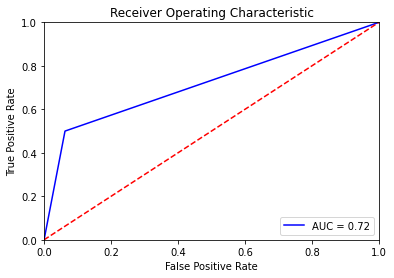

In [429]:
fpr, tpr, threshold = metrics.roc_curve(y_ctest, y_cpred)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decomposition

In [14]:
from prophet import Prophet

In [21]:
pdf = frame[['year_mon','RentalCarGrossSales']]
pdf.columns = ['ds','y']

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -14.5649
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       855.937   2.78531e-05       104.044       0.819       0.819      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     177       856.016   3.04203e-08       95.5455      0.8258      0.8258      215   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


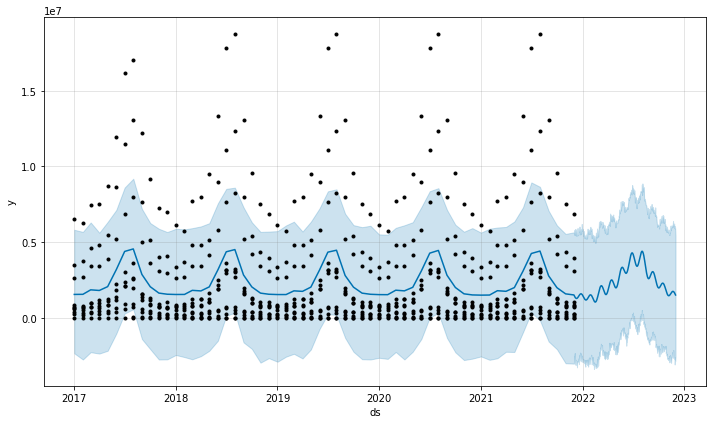

In [27]:
m = Prophet(seasonality_mode='multiplicative').fit(pdf)
future = m.make_future_dataframe(periods=365)
fcst = m.predict(future)
fig = m.plot(fcst)

In [23]:
fcst

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0    2017-01-01  2.434869e+06 -2.746239e+06  5.591669e+06  2.434869e+06   
1    2017-02-01  2.433309e+06 -2.891823e+06  5.878679e+06  2.433309e+06   
2    2017-03-01  2.431901e+06 -2.477259e+06  6.187290e+06  2.431901e+06   
3    2017-04-01  2.430310e+06 -2.493332e+06  6.213713e+06  2.430310e+06   
4    2017-05-01  2.428771e+06 -1.965725e+06  6.235830e+06  2.428771e+06   
...         ...           ...           ...           ...           ...   
3707 2031-11-27  2.155667e+06 -2.623372e+06  5.649159e+06  2.154601e+06   
3708 2031-11-28  2.155616e+06 -2.934802e+06  5.947666e+06  2.154549e+06   
3709 2031-11-29  2.155565e+06 -3.045602e+06  5.858484e+06  2.154498e+06   
3710 2031-11-30  2.155513e+06 -2.762321e+06  5.393134e+06  2.154446e+06   
3711 2031-12-01  2.155462e+06 -2.643468e+06  5.994187e+06  2.154395e+06   

       trend_upper  multiplicative_terms  multiplicative_terms_lower  \
0     2.434869e+06             -0.367159                   -0.367159   
1     2.433309e+06             -0.364030                   -0.364030   
2     2.431901e+06             -0.241986                   -0.241986   
3     2.430310e+06             -0.258424                   -0.258424   
4     2.428771e+06             -0.153310                   -0.153310   
...            ...                   ...                         ...   
3707  2.156800e+06             -0.285662                   -0.285662   
3708  2.156749e+06             -0.299622                   -0.299622   
3709  2.156698e+06             -0.315085                   -0.315085   
3710  2.156647e+06             -0.331613                   -0.331613   
3711  2.156596e+06             -0.348735                   -0.348735   

      multiplicative_terms_upper    yearly  yearly_lower  yearly_upper  \
0                      -0.367159 -0.367159     -0.367159     -0.367159   
1                      -0.364030 -0.364030     -0.364030     -0.364030   
2                      -0.241986 -0.241986     -0.241986     -0.241986   
3                      -0.258424 -0.258424     -0.258424     -0.258424   
4                      -0.153310 -0.153310     -0.153310     -0.153310   
...                          ...       ...           ...           ...   
3707                   -0.285662 -0.285662     -0.285662     -0.285662   
3708                   -0.299622 -0.299622     -0.299622     -0.299622   
3709                   -0.315085 -0.315085     -0.315085     -0.315085   
3710                   -0.331613 -0.331613     -0.331613     -0.331613   
3711                   -0.348735 -0.348735     -0.348735     -0.348735   

      additive_terms  additive_terms_lower  additive_terms_upper          yhat  
0                0.0                   0.0                   0.0  1.540885e+06  
1                0.0                   0.0                   0.0  1.547512e+06  
2                0.0                   0.0                   0.0  1.843415e+06  
3                0.0                   0.0                   0.0  1.802259e+06  
4                0.0                   0.0                   0.0  2.056416e+06  
...              ...                   ...                   ...           ...  
3707             0.0                   0.0                   0.0  1.539875e+06  
3708             0.0                   0.0                   0.0  1.509746e+06  
3709             0.0                   0.0                   0.0  1.476378e+06  
3710             0.0                   0.0                   0.0  1.440717e+06  
3711             0.0                   0.0                   0.0  1.403776e+06  

[3712 rows x 16 columns]

# Elastic net

In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

In [196]:
# change sampling
X = df.loc[:,df.columns!='RentalCarGrossSales']
y = df.RentalCarGrossSales
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)
# enet_model = ElasticNet().fit(X_train, y_train)
enet_cv_model = ElasticNetCV(cv = 10).fit(X_train,y_train)
y_pred = enet_cv_model.predict(X_test)

In [197]:
np.mean(np.abs((y_test - y_pred) / y_test)) * 100

30.52115834449063

In [200]:
(y_test - y_pred).abs().sum() / y_test.sum()

0.27118028778465825

In [224]:
coef = pd.DataFrame()
coef['feature'] = X.columns
coef['val'] = enet_cv_model.coef_

### dropped feature

In [239]:
coef[coef.val==0]

feature  val
0                         year  0.0
1                          mon  0.0
2        academic_exams_binary -0.0
3   academic_graduation_binary  0.0
4     academic_holidays_binary  0.0
6      academic_session_binary  0.0
7               attended_count -0.0
8             big_event_binary -0.0
10         demand_surge_binary -0.0
12       qdiscretized_att_bins -0.0
13         day_expo_attendance -0.0
15       short_expo_attendance  0.0
16           observance_binary -0.0
17      school_holidays_binary -0.0
19     baseball_attendance_bin  0.0
21   basketball_attendance_bin -0.0
23       soccer_attendance_bin -0.0
24       sports_attendance_bin -0.0
26                sports_count -0.0
28           conferences_count -0.0
30                 expos_count -0.0
32             community_count -0.0
34             festivals_count -0.0
36       performing_arts_count -0.0
38              concerts_count -0.0
39    phq_rank_public_holidays -0.0
40    phq_rank_school_holidays  0.0

### selected feature

In [229]:
a = coef[coef.val!=0].sort_values('val',ascending=False)
a

feature        val
33                festivals_sum  21.117767
18          baseball_attendance  15.104469
25                   sports_sum  13.918668
22            soccer_attendance   5.279198
5   academic_session_attendance   4.552482
29                    expos_sum  -0.018534
14          multiday_attendance  -0.187248
20        basketball_attendance  -0.627426
41      attended_sum_attendance  -2.420592
27              conferences_sum  -2.996913
37                 concerts_sum  -5.245782
11      large_events_attendance  -8.348773
31                community_sum -10.705813
35          performing_arts_sum -16.464289
9           cultural_attendance -16.833476

<AxesSubplot:xlabel='val', ylabel='feature'>

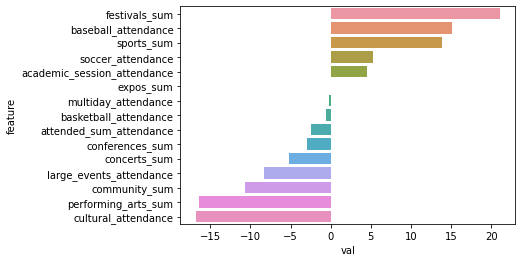

In [230]:
sns.barplot(data=a,x='val',y='feature')

In [198]:
test = X_test.copy()
test['prd'] = y_pred
test['test']=y_test
test.sort_values(['year','mon'],inplace=True)
test['year_mon']=test.apply(lambda x: str(int(x.year))+'-'+str(int(x.mon)),axis=1)


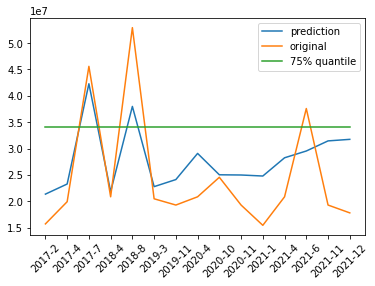

In [238]:
plt.plot(test.year_mon, test.prd, label = "prediction")
plt.plot(test.year_mon, test.test, label = "original")
plt.plot(test.year_mon,[uper_thresh]*len(test.year_mon),label='75% quantile')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
from numpy import arange
from sklearn.model_selection import RepeatedKFold
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]#0,1,10
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)
# fit model
model.fit(X, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:526: Conv

# Outliers predict

In [240]:
df.head()

year  RentalCarGrossSales  mon  academic_exams_binary  \
0  2017             19951807    4                    0.0   
1  2017             50539918    8                    0.0   
2  2017             17555169   12                    0.0   
3  2017             15746674    2                    0.0   
4  2017             16054808    1                    0.0   

   academic_graduation_binary  academic_holidays_binary  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   academic_session_attendance  academic_session_binary  attended_count  \
0                          0.0                      0.0             0.0   
1                          0.0                      0.0             0.0   
2                          0.0                      0.0             0.0   
3                          0.0                      0.0             0.0   
4                          0.0                      0.0             0.0   

   big_event_binary  cultural_attendance  demand_surge_binary  \
0               0.0                  0.0                  0.0   
1               0.0                  0.0                  0.0   
2               0.0                  0.0                  0.0   
3               0.0                  0.0                  0.0   
4               0.0                  0.0                  0.0   

   large_events_attendance  qdiscretized_att_bins  day_expo_attendance  \
0                      0.0                      0                  0.0   
1                      0.0                      0                  0.0   
2                      0.0                      0                  0.0   
3                      0.0                      0                  0.0   
4                      0.0                      0                  0.0   

   multiday_attendance  short_expo_attendance  observance_binary  \
0                  0.0                    0.0                0.0   
1                  0.0                    0.0                0.0   
2                  0.0                    0.0                0.0   
3                  0.0                    0.0                0.0   
4                  0.0                    0.0                0.0   

   school_holidays_binary  baseball_attendance  baseball_attendance_bin  \
0                     0.0                  0.0                        0   
1                     0.0                  0.0                        0   
2                     0.0                  0.0                        0   
3                     0.0                  0.0                        0   
4                     0.0                  0.0                        0   

   basketball_attendance  basketball_attendance_bin  soccer_attendance  \
0                    0.0                          0                0.0   
1                    0.0                          0                0.0   
2                    0.0                          0                0.0   
3                    0.0                          0                0.0   
4                    0.0                          0                0.0   

   soccer_attendance_bin  sports_attendance_bin  sports_sum  sports_count  \
0                      0                      0    376391.0          39.0   
1                      0                      0    577996.0          27.0   
2                      0                      0    336534.0          28.0   
3                      0                      0    120106.0          12.0   
4                      0                      0    185598.0          16.0   

   conferences_sum  conferences_count  expos_sum  expos_count  community_sum  \
0          77006.0               65.0    34759.0         21.0        66453.0   
1          21854.0               96.0    29267.0         15.0       1224

In [76]:
sales_per_brand.head()

Company    year_mon  year  mon_int  RentalCarGrossSales
0  AVIS BUDGET Car Rental  2017-01-01  2017        1              3453308
1  AVIS BUDGET Car Rental  2017-02-01  2017        2              3735767
2  AVIS BUDGET Car Rental  2017-03-01  2017        3              4581703
3  AVIS BUDGET Car Rental  2017-04-01  2017        4              4785559
4  AVIS BUDGET Car Rental  2017-05-01  2017        5              5445566

# Per brand

In [69]:
sales_per_brand = frame.groupby(['Company','year_mon','year','mon_int'])['RentalCarGrossSales'].sum().reset_index()

In [97]:
sales_per_brand.Company.unique()

array(['AVIS BUDGET Car Rental', 'Alamo', 'Avis', 'Budget',
       'CMC Investments Inc       ', 'DTG', 'Dollar (CMC)',
       'E-Z Rent A Car Inc.     ', 'EAN Holdings, LLC     ',
       'EZ Rent A Car', 'Enterprise', 'Fox', 'Fox Rent-a-Car, Inc',
       'Hertz - Off Airport', 'Hertz - On Airport', 'Hertz Corporation',
       'National', 'Payless', 'Payless Car Rental, Inc.',
       'Seattle Rent A Wreck', 'Silvercar', 'Silvercar, Inc.', 'Sixt',
       'Sixt Rent A Car LLC', 'Thrifty (DTG)',
       'Zeeba WA, LLC dba Zeeba Rent-A-Van'], dtype=object)

In [98]:
# sales_per_brand[sales_per_brand['Company'].str.contains('Rent A Car', case=True)]
sales_per_brand[(sales_per_brand.Company == 'E-Z Rent A Car Inc.     ') | (sales_per_brand.Company== 'EZ Rent A Car')]

Company    year_mon  year  mon_int  RentalCarGrossSales
156  E-Z Rent A Car Inc.       2017-01-01  2017        1               260116
157  E-Z Rent A Car Inc.       2017-02-01  2017        2               192646
158  E-Z Rent A Car Inc.       2017-03-01  2017        3               280673
159  E-Z Rent A Car Inc.       2017-04-01  2017        4               272112
160  E-Z Rent A Car Inc.       2017-05-01  2017        5               285059
161  E-Z Rent A Car Inc.       2017-06-01  2017        6               370400
162  E-Z Rent A Car Inc.       2017-07-01  2017        7               574828
163  E-Z Rent A Car Inc.       2017-08-01  2017        8               715847
164  E-Z Rent A Car Inc.       2017-09-01  2017        9               377568
165  E-Z Rent A Car Inc.       2017-10-01  2017       10               302891
166  E-Z Rent A Car Inc.       2017-11-01  2017       11               203514
167  E-Z Rent A Car Inc.       2017-12-01  2017       12               203512
168  E-Z Rent A Car Inc.       2018-01-01  2018        1               194027
169  E-Z Rent A Car Inc.       2018-02-01  2018        2               189345
170  E-Z Rent A Car Inc.       2018-03-01  2018        3               309532
171  E-Z Rent A Car Inc.       2018-04-01  2018        4               254668
172  E-Z Rent A Car Inc.       2018-05-01  2018        5               296098
173  E-Z Rent A Car Inc.       2018-06-01  2018        6               498365
174  E-Z Rent A Car Inc.       2018-07-01  2018        7               730393
175  E-Z Rent A Car Inc.       2018-08-01  2018        8               688044
176  E-Z Rent A Car Inc.       2018-09-01  2018        9               409639
177  E-Z Rent A Car Inc.       2018-10-01  2018       10               367758
178  E-Z Rent A Car Inc.       2018-11-01  2018       11               271443
179  E-Z Rent A Car Inc.       2018-12-01  2018       12               253266
180  E-Z Rent A Car Inc.       2019-01-01  2019        1               215873
181  E-Z Rent A Car Inc.       2019-02-01  2019        2               198261
182  E-Z Rent A Car Inc.       2019-03-01  2019        3               246651
183  E-Z Rent A Car Inc.       2019-04-01  2019        4               219191
184  E-Z Rent A Car Inc.       2019-05-01  2019        5               188004
185  E-Z Rent A Car Inc.       2019-06-01  2019        6               344134
186  E-Z Rent A Car Inc.       2019-07-01  2019        7               473369
187  E-Z Rent A Car Inc.       2019-08-01  2019        8               487628
188  E-Z Rent A Car Inc.       2019-09-01  2019        9               367956
189  E-Z Rent A Car Inc.       2019-10-01  2019       10               257580
190  E-Z Rent A Car Inc.       2019-11-01  2019       11               163294
191  E-Z Rent A Car Inc.       2019-12-01  2019       12               242093
228             EZ Rent A Car  2020-01-01  2020        1               177544
229             EZ Rent A Car  2020-02-01  2020        2               110810
230             EZ Rent A Car  2020-03-01  2020        3                10128
231             EZ Rent A Car  2020-04-01  2020        4                 2657
232             EZ Rent A Car  2020-05-01  2020        5                    0
233             EZ Rent A Car  2020-06-01  2020        6                    0
234             EZ Rent A Car  2020-07-01  2020        7                    0
235             EZ Rent A Car  2020-08-01  2020        8                    0
236             EZ Rent A Car  2020-09-01  2020        9                    0
237             EZ Rent A Car  2020-10-01  2020       10                    0
238             EZ Rent A Car  2020-11-01  2020       11                    0
239             EZ Rent A Car  2020-12-01  2020       12                    0

In [104]:
# Hertz on/off airport
hertz = sales_per_brand[sales_per_brand['Company'].str.contains('Hertz', case=True)].groupby(['year_mon','year','mon_int']).sum().reset_index()

In [70]:
frame.groupby(['Company','year'])['RentalCarGrossSales'].count().reset_index()

Company  year  RentalCarGrossSales
0               AVIS BUDGET Car Rental  2017                   12
1               AVIS BUDGET Car Rental  2018                   12
2               AVIS BUDGET Car Rental  2019                   12
3                                Alamo  2020                   12
4                                 Avis  2020                   12
5                               Budget  2020                   12
6           CMC Investments Inc         2017                   12
7           CMC Investments Inc         2018                   12
8           CMC Investments Inc         2019                   12
9                                  DTG  2017                   12
10                                 DTG  2018                   12
11                                 DTG  2019                   12
12                        Dollar (CMC)  2020                   12
13            E-Z Rent A Car Inc.       2017                   12
14            E-Z Rent A Car Inc.       2018                   12
15            E-Z Rent A Car Inc.       2019                   12
16              EAN Holdings, LLC       2017                   12
17              EAN Holdings, LLC       2018                   12
18              EAN Holdings, LLC       2019                   12
19                       EZ Rent A Car  2020                   12
20                          Enterprise  2020                   12
21                                 Fox  2020                   12
22                 Fox Rent-a-Car, Inc  2017                   12
23                 Fox Rent-a-Car, Inc  2018                   12
24                 Fox Rent-a-Car, Inc  2019                   12
25                 Hertz - Off Airport  2020                   12
26                  Hertz - On Airport  2020                   12
27                   Hertz Corporation  2017                   12
28                   Hertz Corporation  2018                   12
29                   Hertz Corporation  2019                   12
30                            National  2020                   12
31                             Payless  2020                   12
32            Payless Car Rental, Inc.  2017                   12
33            Payless Car Rental, Inc.  2018                   12
34            Payless Car Rental, Inc.  2019                   12
35                Seattle Rent A Wreck  2017                   12
36                Seattle Rent A Wreck  2018                   12
37                Seattle Rent A Wreck  2019                   12
38                Seattle Rent A Wreck  2020                    2
39                           Silvercar  2020                   12
40                     Silvercar, Inc.  2017                    5
41                     Silvercar, Inc.  2018                   12
42                     Silvercar, Inc.  2019                   12
43                                Sixt  2020                   12
44                 Sixt Rent A Car LLC  2017                   12
45                 Sixt Rent A Car LLC  2018                   12
46                 Sixt Rent A Car LLC  2019                   12
47                       Thrifty (DTG)  2020                   12
48  Zeeba WA, LLC dba Zeeba Rent-A-Van  2018                   10
49  Zeeba WA, LLC dba Zeeba Rent-A-Van  2019                   12

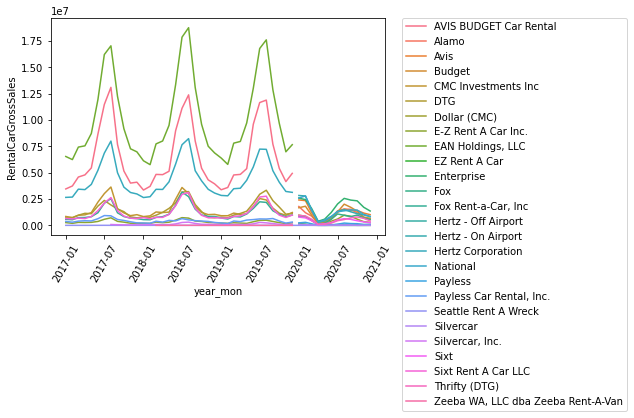

In [86]:
# for cmp in sales_per_brand.Company.unique():
#     plt.figure()
sns.lineplot(data=sales_per_brand,x='year_mon',y='RentalCarGrossSales',hue='Company')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# .set_title(f'{cmp}')
plt.xticks(rotation = '60');

In [10]:
from sklearn.ensemble import RandomForestClassifier
from prophet.diagnostics import cross_validation

In [11]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<AxesSubplot:xlabel='year_mon'>

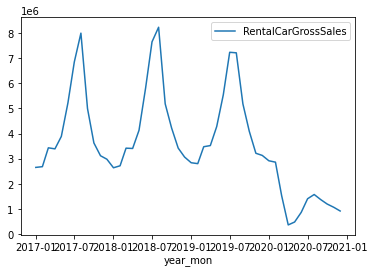

In [115]:
hertz.plot(x='year_mon',y='RentalCarGrossSales')

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<Figure size 432x288 with 0 Axes>

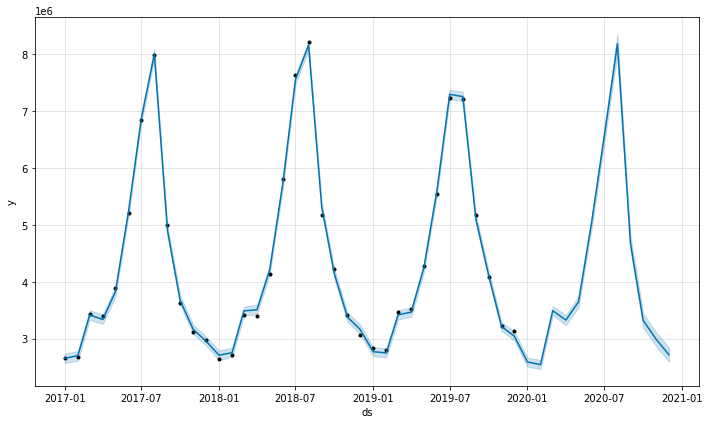

<AxesSubplot:xlabel='ds'>

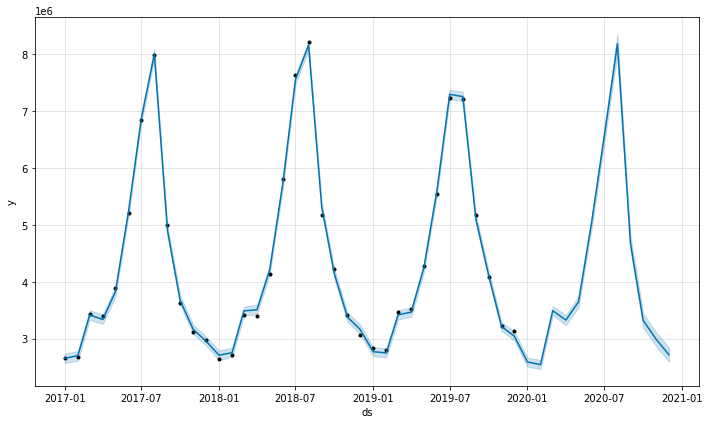

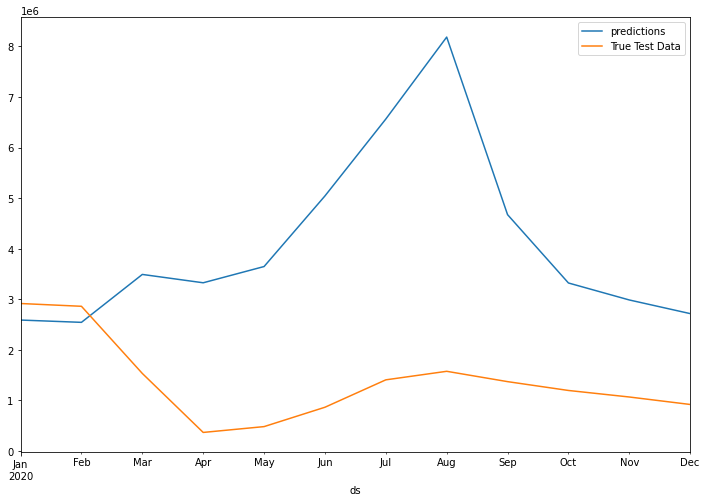

In [119]:
# for company in ['E-Z Rent A Car Inc.     ']:#sales_per_brand.Company.unique():
d = {}
print('-*-*'*20)
#     print(company)
#     d['company'] = company
#     tmp_sales = sales_per_brand[sales_per_brand.Company==company].copy()
tmp_sales = hertz.copy()

# prophet decomposition
decomp_df = tmp_sales[['year_mon','RentalCarGrossSales']]
decomp_df.columns = ['ds','y']
decomp_df.ds = pd.to_datetime(decomp_df.ds)

pph_train = decomp_df[decomp_df.ds<='2019-12-31']
pph_test = decomp_df[decomp_df.ds>'2019-12-31']

#     # 2019, 2020, 2021
#     cutoffs= pd.date_range(start='2019-01-01',end='2021-12-31',freq='12MS')
m = Prophet(seasonality_mode='multiplicative',yearly_seasonality=True,weekly_seasonality=False,daily_seasonality=False).fit(pph_train)
#     df_cv = cross_validation(m, initial='730 days', period='365 days', horizon = '365 days')
future = m.make_future_dataframe(periods=12,freq='MS')
fcst = m.predict(future)

plt.figure()
m.plot(fcst, uncertainty=True)
plt.show()

m.plot(fcst)
ax=fcst.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
pph_test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2020-01-01','2020-12-31'))

#     fcst['year'] = pd.to_datetime(fcst.ds).dt.year
#     fcst['mon'] = pd.to_datetime(fcst.ds).dt.month
#     # fig = m.plot(fcst)
#     # remainder
#     tmp_sales = pd.merge(tmp_sales,fcst[['year','mon','yhat']],left_on=['year','mon_int'],right_on=['year','mon'])
#     tmp_sales.drop('mon',axis=1,inplace=True)
#     tmp_sales['remainder'] = tmp_sales.RentalCarGrossSales - tmp_sales.yhat

/Users/aisling/Documents/chipotle-live-tv-events-analysis/.venv/lib/python3.9/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
INFO:prophet:n_changepoints greater than number of observations. Using 18.


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


<Figure size 432x288 with 0 Axes>

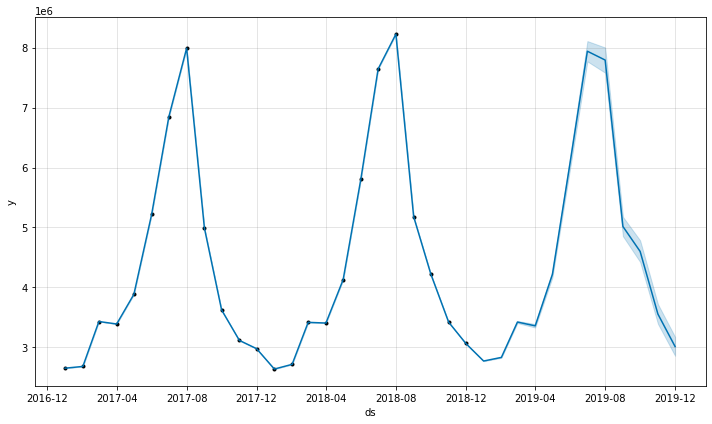

2
11
upper flag percentage:18.18%
[0.         0.02963889 0.07070811 0.         0.00022222 0.05031041
 0.02433025 0.00524206 0.01330864 0.01695833 0.01110185 0.04877513
 0.01957407 0.01818122 0.0318179  0.00611111 0.0222037  0.05701852
 0.0693944  0.02044533 0.01211861 0.00514991 0.         0.01548148
 0.06075617 0.01109524 0.04562037 0.02150265 0.00356481 0.03569312
 0.02181636 0.04387037 0.01305556 0.01152778 0.03799559 0.03120833
 0.01051896 0.00407407 0.02336111 0.01038889 0.0257672  0.01120855
 0.01506173 0.01382099]
Index(['yhat', 'remainder', 'academic_graduation_binary',
       'academic_holidays_binary', 'academic_session_attendance',
       'academic_session_binary', 'attended_count', 'big_event_binary',
       'cultural_attendance', 'demand_surge_binary', 'large_events_attendance',
       'qdiscretized_att_bins', 'day_expo_attendance', 'multiday_attendance',
       'short_expo_attendance', 'observance_binary', 'school_holidays_binary',
       'baseball_attendance', 'baseball_

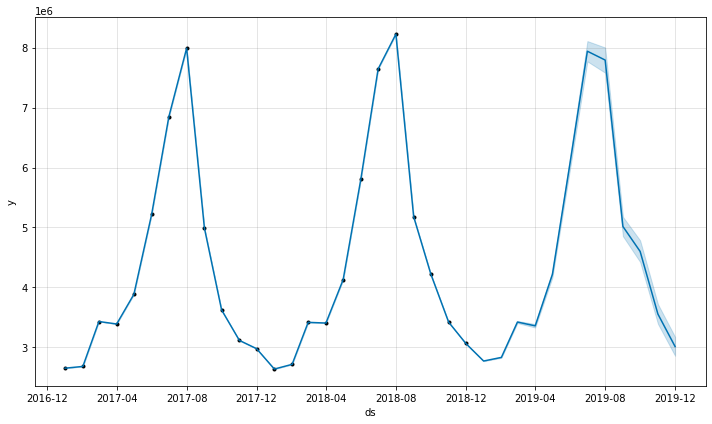

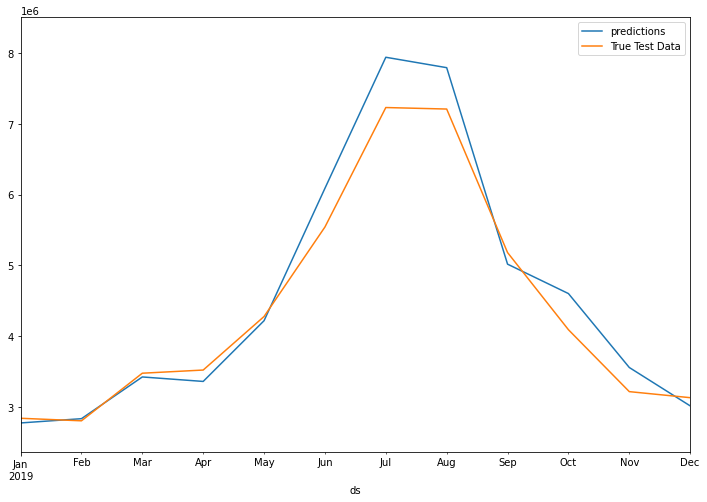

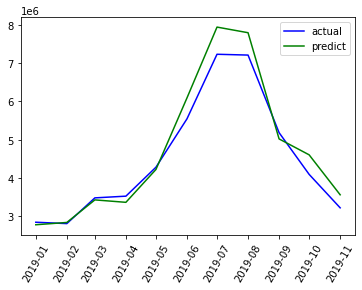

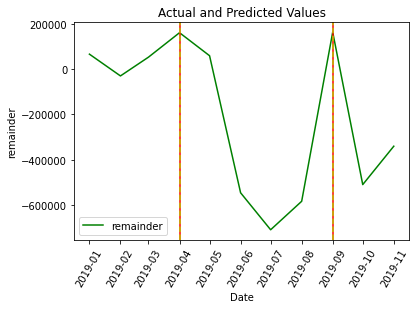

In [137]:
# for company in ['E-Z Rent A Car Inc.     ']:#sales_per_brand.Company.unique():
d = {}
print('-*-*'*20)
#     print(company)
#     d['company'] = company
#     tmp_sales = sales_per_brand[sales_per_brand.Company==company].copy()
tmp_sales = hertz.copy()

# prophet decomposition
decomp_df = tmp_sales[['year_mon','RentalCarGrossSales']]
decomp_df.columns = ['ds','y']
decomp_df.ds = pd.to_datetime(decomp_df.ds)

pph_train = decomp_df[decomp_df.ds<='2018-12-31']
pph_test = decomp_df[(decomp_df.ds>'2018-12-31')&(decomp_df.ds<='2019-12-31')]

#     # 2019, 2020, 2021
#     cutoffs= pd.date_range(start='2019-01-01',end='2021-12-31',freq='12MS')
m = Prophet(seasonality_mode='multiplicative',yearly_seasonality=True,weekly_seasonality=False,daily_seasonality=False).fit(pph_train)
#     df_cv = cross_validation(m, initial='730 days', period='365 days', horizon = '365 days')
future = m.make_future_dataframe(periods=12,freq='MS')
fcst = m.predict(future)

plt.figure()
m.plot(fcst, uncertainty=True)
plt.show()

m.plot(fcst)
ax=fcst.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
pph_test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2019-01-01','2019-12-31'))

#     fcst['year'] = pd.to_datetime(fcst.ds).dt.year
#     fcst['mon'] = pd.to_datetime(fcst.ds).dt.month
#     # fig = m.plot(fcst)
#     # remainder
#     tmp_sales = pd.merge(tmp_sales,fcst[['year','mon','yhat']],left_on=['year','mon_int'],right_on=['year','mon'])
#     tmp_sales.drop('mon',axis=1,inplace=True)
#     tmp_sales['remainder'] = tmp_sales.RentalCarGrossSales - tmp_sales.yhat

fcst['year'] = pd.to_datetime(fcst.ds).dt.year
fcst['mon'] = pd.to_datetime(fcst.ds).dt.month
# fig = m.plot(fcst)
# remainder
tmp_sales = pd.merge(tmp_sales,fcst[['year','mon','yhat']],left_on=['year','mon_int'],right_on=['year','mon'],how='inner')
tmp_sales.drop('mon',axis=1,inplace=True)
tmp_sales['remainder'] = tmp_sales.RentalCarGrossSales - tmp_sales.yhat

tmp_sales.year_mon=pd.to_datetime(tmp_sales.year_mon)
tmp_sales = tmp_sales[tmp_sales.year_mon>='2019-01-01']

# embed events features
tmp_df = pd.merge(tmp_sales,phq_features,left_on=['year','mon_int'],right_on=['year','month'],how='left')
tmp_df.drop(['month','mon_int'],axis=1,inplace=True)
tmp_df['last_mon_sales'] = tmp_df.RentalCarGrossSales.shift(-1)
tmp_df['upper_flag'] = np.where(tmp_df.remainder>tmp_df.remainder.quantile(.75),1,0)
tmp_df.dropna(inplace=True)

X = tmp_df.loc[:,~tmp_df.columns.isin(['upper_flag','RentalCarGrossSales','year_mon'])].copy()
y = tmp_df.upper_flag.copy()
print(y.sum())
print(len(X))
print(f'upper flag percentage:{round(y.sum()/len(X)*100,2)}%')


# Feature selection
fs_model = ExtraTreesClassifier()
fs_model.fit(X,y)
print(fs_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
ft_importances = pd.Series(fs_model.feature_importances_, index=X.columns)
ft_imp_col = ft_importances[ft_importances.values>0].index#ft_importances.sort_values(ascending=False).head(7).index
print(ft_imp_col)

# Classification
Xc = tmp_df.loc[:,tmp_df.columns.isin(ft_imp_col)]
X_ctrain, X_ctest, y_ctrain, y_ctest = train_test_split(Xc, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_ctrain, y_ctrain)
cprd = rf.predict(X_ctest)

# Matrix
accuracy = rf.score(X_ctest, y_ctest)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(accuracy))
d['accuracy'] = accuracy

plt.figure()
# Plot the actual values
plt.plot(tmp_df['year_mon'], tmp_df['RentalCarGrossSales'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(tmp_df['year_mon'], tmp_df['yhat'], 'g-', label = 'predict')
plt.legend()
plt.xticks(rotation = '60');
plt.show()

plt.figure()
plt.plot(tmp_df['year_mon'], tmp_df['remainder'], 'g-', label = 'remainder')
# plot flag period
tmp_df['prd'] = rf.predict(tmp_df.loc[:,tmp_df.columns.isin(ft_imp_col)])
for f in tmp_df[tmp_df.prd==1]['year_mon'].values:
    plt.axvline(x=f,color='r')
for xc in tmp_df[tmp_df.upper_flag==1]['year_mon'].values:
    plt.axvline(x=xc,color='y',linestyle='--')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('remainder'); plt.title('Actual and Predicted Values');
plt.show()



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
E-Z Rent A Car Inc.     

Initial log joint probability = -71.5631
Iteration  1. Log joint probability =    30.5288. Improved by 102.092.
Iteration  2. Log joint probability =    83.0381. Improved by 52.5093.
Iteration  3. Log joint probability =    113.511. Improved by 30.4733.
Iteration  4. Log joint probability =    113.651. Improved by 0.13947.
Iteration  5. Log joint probability =    113.738. Improved by 0.0875428.
Iteration  6. Log joint probability =    113.802. Improved by 0.0640485.
Iteration  7. Log joint probability =    116.139. Improved by 2.33622.
Iteration  8. Log joint probability =    127.846. Improved by 11.7071.
Iteration  9. Log joint probability =    130.621. Improved by 2.77529.
Iteration 10. Log joint probability =    151.376. Improved by 20.7549.
Iteration 11. Log joint probability =    154.582. Improved by 3.20608.
Iteration 12. Log joint probability =    154.844. Improved by 0.262

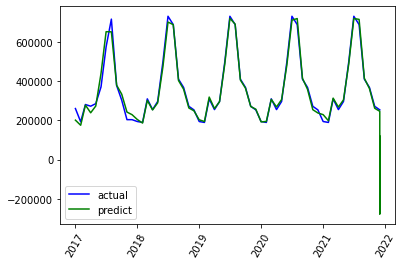

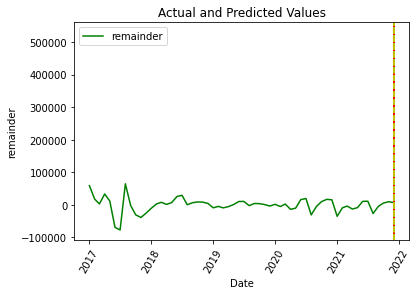

In [144]:
# l = []

# for company in ['E-Z Rent A Car Inc.     ']:#sales_per_brand.Company.unique():
#     d = {}
#     print('-*-*'*20)
#     print(company)
#     d['company'] = company
#     tmp_sales = sales_per_brand[sales_per_brand.Company==company].copy()
    
#     # prophet decomposition
#     decomp_df = tmp_sales[['year_mon','RentalCarGrossSales']]
#     decomp_df.columns = ['ds','y']
    
# #     cutoffs= pd.to_datetime(['2019-01-01','2021-01-01'])
#     df_cv = cross_validation(decomp_df, initial='730 days', period='365 days', horizon = '365 days')
    
#     m = Prophet(seasonality_mode='multiplicative').fit(decomp_df)
#     future = m.make_future_dataframe(periods=365)
#     fcst = m.predict(future)
#     fcst['year'] = pd.to_datetime(fcst.ds).dt.year
#     fcst['mon'] = pd.to_datetime(fcst.ds).dt.month
#     # fig = m.plot(fcst)
#     # remainder
#     tmp_sales = pd.merge(tmp_sales,fcst[['year','mon','yhat']],left_on=['year','mon_int'],right_on=['year','mon'])
#     tmp_sales.drop('mon',axis=1,inplace=True)
#     tmp_sales['remainder'] = tmp_sales.RentalCarGrossSales - tmp_sales.yhat
    
#     # embed events features
#     tmp_df = pd.merge(tmp_sales,phq_features,left_on=['year','mon_int'],right_on=['year','month'],how='left')
#     tmp_df.drop(['Company','month','mon_int'],axis=1,inplace=True)
#     tmp_df['last_mon_sales'] = tmp_df.RentalCarGrossSales.shift(-1)
#     tmp_df['upper_flag'] = np.where(tmp_df.remainder>tmp_df.remainder.quantile(.75),1,0)
#     tmp_df.dropna(inplace=True)
    
#     X = tmp_df.loc[:,~tmp_df.columns.isin(['upper_flag','RentalCarGrossSales','year_mon'])].copy()
#     y = tmp_df.upper_flag.copy()
#     print(y.sum())
#     print(len(X))
#     print(f'upper flag percentage:{round(y.sum()/len(X)*100,2)}%')
    

#     # Feature selection
#     fs_model = ExtraTreesClassifier()
#     fs_model.fit(X,y)
#     print(fs_model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#     ft_importances = pd.Series(fs_model.feature_importances_, index=X.columns)
#     ft_imp_col = ft_importances[ft_importances.values>0].index#ft_importances.sort_values(ascending=False).head(7).index
#     print(ft_imp_col)

#     # Classification
#     Xc = tmp_df.loc[:,tmp_df.columns.isin(ft_imp_col)]
#     X_ctrain, X_ctest, y_ctrain, y_ctest = train_test_split(Xc, y, test_size=0.3, random_state=42)
#     rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
#     rf.fit(X_ctrain, y_ctrain)
#     cprd = rf.predict(X_ctest)

#     # Matrix
#     accuracy = rf.score(X_ctest, y_ctest)
#     print('Accuracy of random forest classifier on test set: {:.2f}'.format(accuracy))
#     d['accuracy'] = accuracy
    
#     plt.figure()
#     # Plot the actual values
#     plt.plot(tmp_df['year_mon'], tmp_df['RentalCarGrossSales'], 'b-', label = 'actual')
#     # Plot the predicted values
#     plt.plot(tmp_df['year_mon'], tmp_df['yhat'], 'g-', label = 'predict')
#     plt.legend()
#     plt.xticks(rotation = '60');
#     plt.show()
    
#     plt.figure()
#     plt.plot(tmp_df['year_mon'], tmp_df['remainder'], 'g-', label = 'remainder')
#     # plot flag period
#     tmp_df['prd'] = rf.predict(tmp_df.loc[:,tmp_df.columns.isin(ft_imp_col)])
#     for f in tmp_df[tmp_df.prd==1]['year_mon'].values:
#         plt.axvline(x=f,color='r')
#     for xc in tmp_df[tmp_df.upper_flag==1]['year_mon'].values:
#         plt.axvline(x=xc,color='y',linestyle='--')
#     plt.xticks(rotation = '60'); 
#     plt.legend()
#     # Graph labels
#     plt.xlabel('Date'); plt.ylabel('remainder'); plt.title('Actual and Predicted Values');
#     plt.show()
    
#     l.append(d)

In [92]:
pd.DataFrame(l)

company  accuracy
0               AVIS BUDGET Car Rental  0.891347
1           CMC Investments Inc         0.989017
2                                  DTG  1.000000
3             E-Z Rent A Car Inc.       0.991629
4               EAN Holdings, LLC       0.911288
5                  Fox Rent-a-Car, Inc  0.989372
6                    Hertz Corporation  0.999684
7             Payless Car Rental, Inc.  0.988737
8                 Seattle Rent A Wreck  0.805329
9                      Silvercar, Inc.  0.814223
10                 Sixt Rent A Car LLC  0.947732
11  Zeeba WA, LLC dba Zeeba Rent-A-Van  0.995349

In [95]:
tmp_sales

Company    year_mon  year  mon_int  \
0   Zeeba WA, LLC dba Zeeba Rent-A-Van  2018-03-01  2018        3   
1   Zeeba WA, LLC dba Zeeba Rent-A-Van  2018-04-01  2018        4   
2   Zeeba WA, LLC dba Zeeba Rent-A-Van  2018-05-01  2018        5   
3   Zeeba WA, LLC dba Zeeba Rent-A-Van  2018-06-01  2018        6   
4   Zeeba WA, LLC dba Zeeba Rent-A-Van  2018-07-01  2018        7   
..                                 ...         ...   ...      ...   
65  Zeeba WA, LLC dba Zeeba Rent-A-Van  2021-12-01  2021       12   
66  Zeeba WA, LLC dba Zeeba Rent-A-Van  2021-12-01  2021       12   
67  Zeeba WA, LLC dba Zeeba Rent-A-Van  2021-12-01  2021       12   
68  Zeeba WA, LLC dba Zeeba Rent-A-Van  2021-12-01  2021       12   
69  Zeeba WA, LLC dba Zeeba Rent-A-Van  2021-12-01  2021       12   

    RentalCarGrossSales          yhat     remainder  
0                  3963  1.809936e+06 -1.805973e+06  
1                     0  1.772811e+06 -1.772811e+06  
2                   516  2.039968e+06 -2.039452e+06  
3                  3019  3.165112e+06 -3.162093e+06  
4                  2237  4.358500e+06 -4.356263e+06  
..                  ...           ...           ...  
65                 1098  1.580636e+06 -1.579538e+06  
66                 1098  1.573272e+06 -1.572174e+06  
67                 1098  1.560023e+06 -1.558925e+06  
68                 1098  1.541225e+06 -1.540127e+06  
69                 1098  1.517403e+06 -1.516305e+06  

[70 rows x 7 columns]

In [75]:
tmp_df

year  RentalCarGrossSales     remainder  academic_exams_binary  \
0  2017               376930 -1.275681e+06                    0.0   
1  2017               300508 -1.318657e+06                    0.0   
2  2017               401954 -1.180518e+06                    0.0   
3  2017               438457 -1.105116e+06                    0.0   
4  2017               417860 -1.085717e+06                    0.0   

   academic_graduation_binary  academic_holidays_binary  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   academic_session_attendance  academic_session_binary  attended_count  \
0                          0.0                      0.0             0.0   
1                          0.0                      0.0             0.0   
2                          0.0                      0.0             0.0   
3                          0.0                      0.0             0.0   
4                          0.0                      0.0             0.0   

   big_event_binary  cultural_attendance  demand_surge_binary  \
0               0.0                  0.0                  0.0   
1               0.0                  0.0                  0.0   
2               0.0                  0.0                  0.0   
3               0.0                  0.0                  0.0   
4               0.0                  0.0                  0.0   

   large_events_attendance  qdiscretized_att_bins  day_expo_attendance  \
0                      0.0                      0                  0.0   
1                      0.0                      0                  0.0   
2                      0.0                      0                  0.0   
3                      0.0                      0                  0.0   
4                      0.0                      0                  0.0   

   multiday_attendance  short_expo_attendance  observance_binary  \
0                  0.0                    0.0                0.0   
1                  0.0                    0.0                0.0   
2                  0.0                    0.0                0.0   
3                  0.0                    0.0                0.0   
4                  0.0                    0.0                0.0   

   school_holidays_binary  baseball_attendance  baseball_attendance_bin  \
0                     0.0                  0.0                        0   
1                     0.0                  0.0                        0   
2                     0.0                  0.0                        0   
3                     0.0                  0.0                        0   
4                     0.0                  0.0                        0   

   basketball_attendance  basketball_attendance_bin  soccer_attendance  \
0                    0.0                          0                0.0   
1                    0.0                          0                0.0   
2                    0.0                          0                0.0   
3                    0.0                          0                0.0   
4                    0.0                          0                0.0   

   soccer_attendance_bin  sports_attendance_bin  sports_sum  sports_count  \
0                      0                      0    185598.0          16.0   
1                      0                      0    120106.0          12.0   
2                      0                      0    133716.0          18.0   
3                      0                      0    376391.0          39.0   
4                      0                      0    536834.0          46.0   

   conferences_sum  conferences_count  expos_sum  expos_count  community_sum  \
0           6650.0               31.0    39920.0         17.0       241157.0   
1          20454.0

In [77]:
sales_per_brand[sales_per_brand.Company=='Payless Car Rental, Inc.']

Company    year_mon  year  mon_int  RentalCarGrossSales
420  Payless Car Rental, Inc.  2017-01-01  2017        1               376930
421  Payless Car Rental, Inc.  2017-02-01  2017        2               300508
422  Payless Car Rental, Inc.  2017-03-01  2017        3               401954
423  Payless Car Rental, Inc.  2017-04-01  2017        4               438457
424  Payless Car Rental, Inc.  2017-05-01  2017        5               417860
425  Payless Car Rental, Inc.  2017-06-01  2017        6               631214
426  Payless Car Rental, Inc.  2017-07-01  2017        7               928834
427  Payless Car Rental, Inc.  2017-08-01  2017        8               905374
428  Payless Car Rental, Inc.  2017-09-01  2017        9               559089
429  Payless Car Rental, Inc.  2017-10-01  2017       10               463939
430  Payless Car Rental, Inc.  2017-11-01  2017       11               340889
431  Payless Car Rental, Inc.  2017-12-01  2017       12               235481
432  Payless Car Rental, Inc.  2018-01-01  2018        1               221816
433  Payless Car Rental, Inc.  2018-02-01  2018        2               198320
434  Payless Car Rental, Inc.  2018-03-01  2018        3               393753
435  Payless Car Rental, Inc.  2018-04-01  2018        4               306144
436  Payless Car Rental, Inc.  2018-05-01  2018        5               470585
437  Payless Car Rental, Inc.  2018-06-01  2018        6               424226
438  Payless Car Rental, Inc.  2018-07-01  2018        7               637768
439  Payless Car Rental, Inc.  2018-08-01  2018        8               521113
440  Payless Car Rental, Inc.  2018-09-01  2018        9               445344
441  Payless Car Rental, Inc.  2018-10-01  2018       10               408055
442  Payless Car Rental, Inc.  2018-11-01  2018       11               372309
443  Payless Car Rental, Inc.  2018-12-01  2018       12               273387
444  Payless Car Rental, Inc.  2019-01-01  2019        1               221816
445  Payless Car Rental, Inc.  2019-02-01  2019        2               198320
446  Payless Car Rental, Inc.  2019-03-01  2019        3               393753
447  Payless Car Rental, Inc.  2019-04-01  2019        4               306144
448  Payless Car Rental, Inc.  2019-05-01  2019        5               470585
449  Payless Car Rental, Inc.  2019-06-01  2019        6               424226
450  Payless Car Rental, Inc.  2019-07-01  2019        7               637768
451  Payless Car Rental, Inc.  2019-08-01  2019        8               521113
452  Payless Car Rental, Inc.  2019-09-01  2019        9               445344
453  Payless Car Rental, Inc.  2019-10-01  2019       10               408055
454  Payless Car Rental, Inc.  2019-11-01  2019       11               372309
455  Payless Car Rental, Inc.  2019-12-01  2019       12               273387
456  Payless Car Rental, Inc.  2020-01-01  2020        1               221816
457  Payless Car Rental, Inc.  2020-02-01  2020        2               198320
458  Payless Car Rental, Inc.  2020-03-01  2020        3               393753
459  Payless Car Rental, Inc.  2020-04-01  2020        4               306144
460  Payless Car Rental, Inc.  2020-05-01  2020        5               470585
461  Payless Car Rental, Inc.  2020-06-01  2020        6               424226
462  Payless Car Rental, Inc.  2020-07-01  2020        7               637768
463  Payless Car Rental, Inc.  2020-08-01  2020        8               521113
464  Payless Car Rental, Inc.  2020-09-01  2020        9               445344
465  Payless Car Rental, Inc.  2020-10-01  2020       10               408055
466  Payless Car Rental, Inc.  2020-11-01  2020       11               372309
467  Payless Car Rental, Inc.  2020-12-01  2020       12               273387
468  Payless Car Rental, Inc.  2021-01-01  2021        1               221816
469  Payless Car Rental, Inc.  2021-02-01  2021        2               198320
470  Payless Car Rental, Inc.  2021-03-01  2